In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy
import sklearn
import math


In [2]:
np.array([[True, True, False, False, True, False, False],
       [False, False, False, False, False, True, True],
       [False, True, False, True, True, True, True]
       ])

array([[ True,  True, False, False,  True, False, False],
       [False, False, False, False, False,  True,  True],
       [False,  True, False,  True,  True,  True,  True]])

In [3]:
np.random.random([3, 7]) < 0.65

array([[ True, False, False, False,  True, False,  True],
       [ True, False,  True,  True, False,  True, False],
       [ True,  True,  True,  True,  True, False, False]])

In [4]:
(np.random.random([3, 7]) < 0.65).sum(axis=1) >= 4

array([ True,  True,  True])

In [5]:
n_trial = 1000000
n_battle = 7
win7 = ((np.random.random([n_trial, n_battle]) < 0.65).sum(axis = 1) >= int(n_battle / 2) + 1).sum()
win7 / n_trial

0.799471

In [6]:
n = 5
k = 3
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

10.0

In [7]:
def binomial_dist(k, n, p):
    """ 
    :param k: k
    :param n: n
    :param p: p
    :return : 二項分布
    """
    c = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return c * (p ** k) * ((1 - p) ** (n-k))

In [8]:
win7 = 0

for i in range(4, 8):
    win7 += binomial_dist(i, 7, 0.65)
    
win5 = 0
for i in range(3, 6):
    win5 += binomial_dist(i, 5, 0.65)
    
pd.DataFrame([[win7], [win5]], index=['七番勝負', '五番勝負'], columns=['勝率'])

,勝率
七番勝負,0.800154
五番勝負,0.764831


In [9]:
from scipy.stats import binom

win7 = 0
for i in range(4, 8):
    win7 += binom.pmf(i, 7, 0.65)
    
win7

0.800154265625

In [10]:
def binomial_dist2(k, n, p):
    """ 
    二項分布(正規分布使用)
    :param k: k
    :param n: n
    :param p: p
    :return: 二項分布
    """
    x1 = 1
    x2 = np.sqrt(2* np.pi * n *p * (1-p))
    y1 = -1 * ((k-n*p) ** 2)
    y2 = 2 * n * p * (1 - p)
    return (x1 / x2) * np.exp(y1 / y2)

    
    

In [11]:
win7 = 0
for i in range(4, 8):
    win7 += binomial_dist2(i, 7, 0.65)

win5 = 0
for i in range(3, 6):
    win5 += binomial_dist2(i, 5, 0.65)
    
    
pd.DataFrame([[win7], [win5]], index=['七番勝負', '五番勝負'], columns=['勝率'])

,勝率
七番勝負,0.795540
五番勝負,0.753376


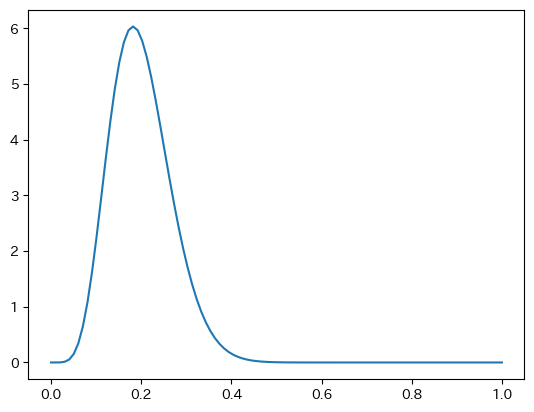

In [13]:
from scipy.special import beta

def beta_distribution(x, a, b):
    """ 
    ベータ分布
    :param x: x
    :param a: a
    :param b: b
    :return: ベータ分布
    """
    numer = x ** (a - 1) * ((1 - x) ** (b - 1))
    denom = beta(a, b)
    return numer / denom

a = 7
b = 28
t = np.linspace(0, 1, 100)
y = [beta_distribution(x, a, b) for x in t]
plt.plot(t, y)

0.27906976744186046


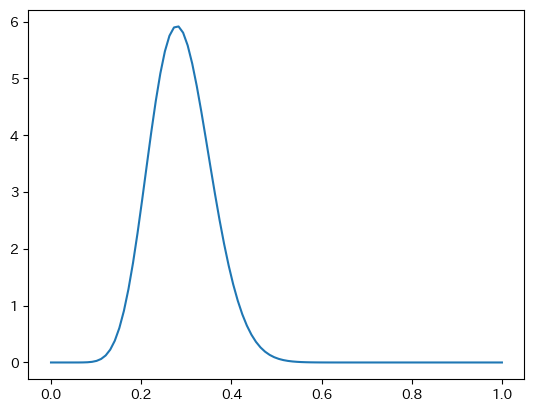

In [16]:
a = 7 + 6
b = 28 + 4
t = np.linspace(0, 1, 100)
y = [beta_distribution(x, a, b) for x in t]
plt.plot(t, y)
print((a-1)/(a+b-2))

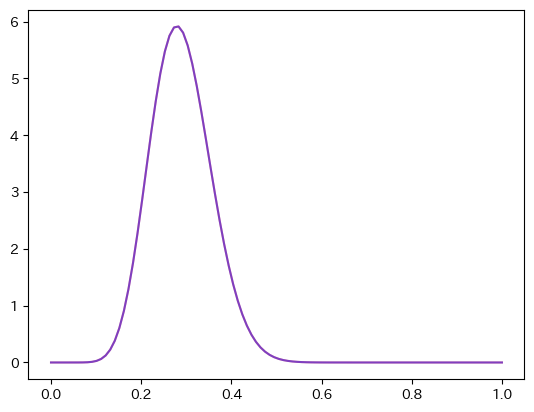

In [19]:
from scipy.stats import beta as beta_dist 

a = 7 + 6
b = 28 + 4
t = np.linspace(0, 1, 100)

rv = beta_dist(a, b)
plt.plot(t, rv.pdf(t), color='red', alpha=0.5)
y2 = [beta_distribution(x, a, b) for x in t]
plt.plot(t, y2, color='blue', alpha=0.5)



In [22]:
from scipy.special import gamma

def beta_distribution_gamma(x, a, b):
    """ 
    ベータ分布(ガンマ関数使用)
    :param x: x
    :param a: a
    :param b: b
    :return: ベータ分布
    """
    numer = gamma(a + b)
    denom = gamma(a) * gamma(b)
    return (numer / denom) * (x ** (a - 1)) * ((1 - x) ** (b - 1))

a = 7
b = 28
i = 0

while i < 100:
    a_ = a + i * 0.6
    b_ = b + i * 0.4
    m = (a_ - 1) / (a_ + b_ - 2)
    if m > 0.5:
        break
    else:
        i += 1
        
i * 0.6 + i * 0.4


100.0